In [ ]:
%matplotlib notebook
import math
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt



def getdist(phi1, theta1, phi2, theta2):
    theta1 = math.radians(theta1)
    phi1 = math.radians(phi1)
    theta2 = math.radians(theta2)
    phi2 = math.radians(phi2)
    tmp = math.sin(phi1)*math.sin(phi2)*math.cos(theta1-theta2) + math.cos(phi1)*math.cos(phi2)
    angle = math.acos(tmp)
    degrees = math.degrees(angle)
    dist = angle*6370
    return dist, degrees

def plot_path(phi1, theta1, phi2, theta2):
    r = 1.05
    pi = np.pi
    cos = np.cos
    sin = np.sin
    theta1 = 2*pi - math.radians(theta1)
    phi1 = math.radians(phi1)
    theta2 = 2*pi - math.radians(theta2)
    phi2 = math.radians(phi2)
    phi, theta = np.mgrid[0.0:pi:20j, 0.0:2.0*pi:20j]
    loc_phi = [phi1, phi2]
    loc_theta = [theta1, theta2]
    
    #SPHERE PLOT
    x = sin(phi)*cos(theta)
    y = sin(phi)*sin(theta)
    z = cos(phi)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect("equal")
    ax.plot_surface(x, y, z,rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    
    #PLOT CITIES
    xx = r*sin(loc_phi)*cos(loc_theta)
    yy = r*sin(loc_phi)*sin(loc_theta)
    zz = r*cos(loc_phi)
    ax.scatter(xx,yy,zz, color='r', s=40)
    
    #PLOT PATH
    vec1 = [r*sin(phi1)*cos(theta1), r*sin(phi1)*sin(theta1), r*cos(phi1)]
    vec2 = [r*sin(phi2)*cos(theta2), r*sin(phi2)*sin(theta2), r*cos(phi2)]
    
    n = np.cross(vec1, vec2)
    
    path_phi = np.arctan(-n[2] / (n[0]*cos(theta)+n[1]*sin(theta)))
    xxx = r*sin(path_phi)*cos(theta)
    yyy = r*sin(path_phi)*sin(theta)
    zzz = r*cos(path_phi)
    
    ax.scatter(xxx, yyy, zzz, color='g', s=10)
    
    plt.show()

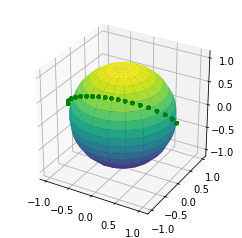

In [2]:
plot_path(45.04, 93.1, 123.87, 208.78)